In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filnavn = '../data/table.csv' 
data = pd.read_csv(filnavn, sep=";", engine='python') #leser inn dataen fra filen.

print(data.head()) #sjekker at dataen er formatert som ønsket. 


           Navn  Stasjon Tid(norsk normaltid) Høyeste vindkast (1 t)  \
0  Slettnes Fyr  SN96400     01.01.2024 01:00                   10,3   
1  Slettnes Fyr  SN96400     01.01.2024 02:00                    9,9   
2  Slettnes Fyr  SN96400     01.01.2024 03:00                    8,1   
3  Slettnes Fyr  SN96400     01.01.2024 04:00                    8,9   
4  Slettnes Fyr  SN96400     01.01.2024 05:00                    8,3   

  Lufttemperatur  
0           -7,2  
1           -6,9  
2           -8,8  
3           -8,6  
4           -7,6  


In [5]:
# Sjekke for manglende verdier
print(data.isnull().sum(), "\n")

# Sjekke datatyper
print(data.dtypes)

Navn                      0
Stasjon                   1
Tid(norsk normaltid)      1
Høyeste vindkast (1 t)    1
Lufttemperatur            1
dtype: int64 

Navn                      object
Stasjon                   object
Tid(norsk normaltid)      object
Høyeste vindkast (1 t)    object
Lufttemperatur            object
dtype: object


In [6]:
# Fjerne eventuelle skjulte tegn
data.columns = data.columns.str.replace("\ufeff", "").str.strip()

# Konvertere relevante kolonner til numerisk format
data["Høyeste vindkast (1 t)"] = [
    float(x.replace(",", ".")) if isinstance(x, str) else x 
    for x in data["Høyeste vindkast (1 t)"]
]

data["Lufttemperatur"] = [
    float(x.replace(",", ".")) if isinstance(x, str) else x 
    for x in data["Lufttemperatur"]
]
#Sjekker at endringene er gjort riktig for den ene kolonnen.
print(data["Høyeste vindkast (1 t)"])

# Konvertere 'Tid(norsk normaltid)' til datetime-format
data["Tid(norsk normaltid)"] = [pd.to_datetime(t, format="%d.%m.%Y %H:%M") for t in data["Tid(norsk normaltid)"]]


# Statistisk analyse
summary = data[["Høyeste vindkast (1 t)","Lufttemperatur"]].describe()

# Vise resultatene
print(summary)


0       10.3
1        9.9
2        8.1
3        8.9
4        8.3
        ... 
8804    14.8
8805    17.0
8806    14.5
8807    14.0
8808     NaN
Name: Høyeste vindkast (1 t), Length: 8809, dtype: float64
       Høyeste vindkast (1 t)  Lufttemperatur
count             8808.000000     8808.000000
mean                11.288068        3.792212
std                  5.776701        7.034264
min                  0.900000      -15.700000
25%                  7.100000       -1.200000
50%                 10.500000        3.000000
75%                 14.400000        8.100000
max                 39.200000       28.800000


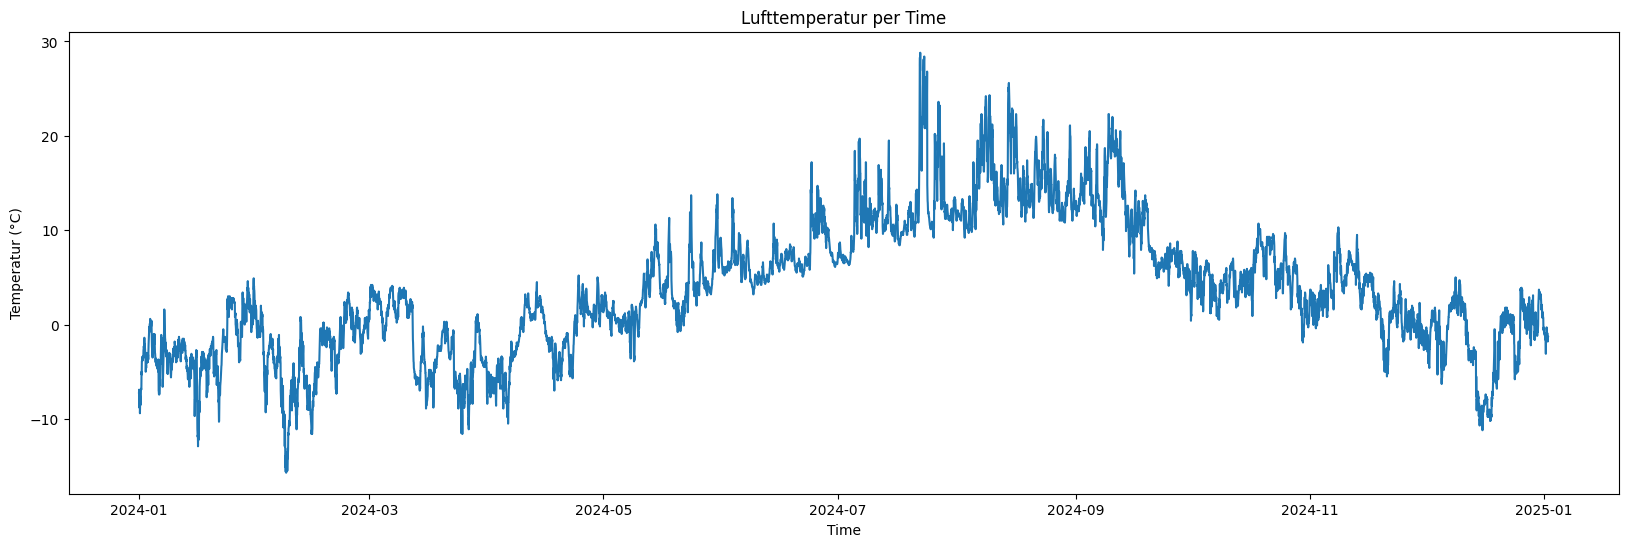

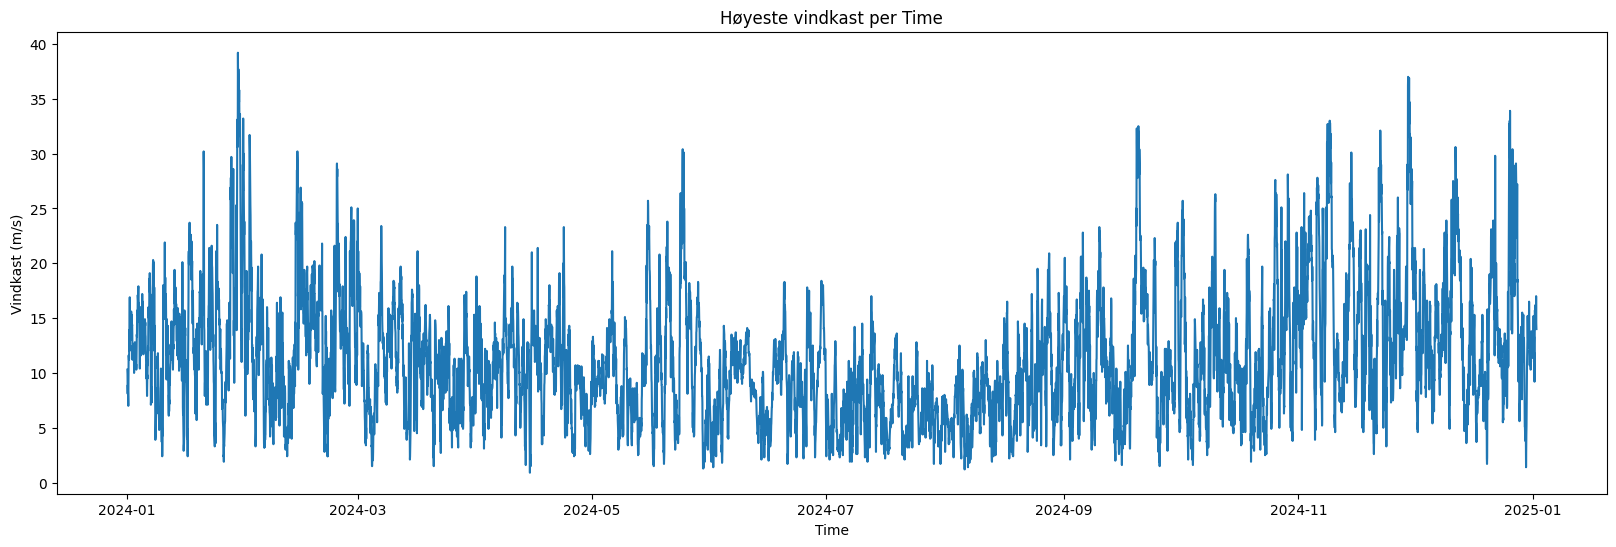

In [10]:

# Plotte gjennomsnittlig temperatur per time
plt.figure(figsize=(20, 6))
plt.plot(data["Tid(norsk normaltid)"], data["Lufttemperatur"])
plt.title('Lufttemperatur per Time')
plt.xlabel('Time')
plt.ylabel('Temperatur (°C)')
plt.show()

# Plotte gjennomsnittlig nedbør per time
plt.figure(figsize=(20, 6))
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"])
plt.title('Høyeste vindkast per Time')
plt.xlabel('Time')
plt.ylabel('Vindkast (m/s)')
plt.show()